<a href="https://colab.research.google.com/github/Parksiwook/first/blob/main/Day0209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import os, glob, sys
from sklearn import model_selection
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!unzip -o /content/drive/MyDrive/dataset.zip

In [ ]:
img_dir = '/content'
categories = ['cat','dog']

image_w = 64
image_h = 64

x, y = [], []
for idx, cate in enumerate(categories):
    img_dir_detail = os.path.join(img_dir, cate)
    files = glob.glob(os.path.join(img_dir_detail, '*.jpg'))

    for f in files:
        img = Image.open(f)
        img = img.convert('RGB')
        img = img.resize((image_w, image_h))
        img = np.asarray(img)
        x.append(img)
        y.append(idx)

x = np.array(x)
y = np.array(y)

xy = model_selection.train_test_split(x, y, test_size=0.1, stratify=y)
np.save('/content/data.npy', xy)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = np.load('/content/data.npy', allow_pickle=True)

x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(2148, 64, 64, 3) (239, 64, 64, 3)
(2148,) (239,)


In [ ]:
conv_base = keras.applications.VGG16(include_top=False)
conv_base.trainable = False

model = Sequential()
model.add(InputLayer(x_train.shape[1:]))
model.add(conv_base)

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.RMSprop(0.0003),
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                         

In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))
print('acc:', model.evaluate(x_test, y_test))

Epoch 1/15
68/68 [==============================] - 99s 1s/step - loss: 0.6132 - acc: 0.6569 - val_loss: 0.5201 - val_acc: 0.7322
Epoch 2/15
68/68 [==============================] - 90s 1s/step - loss: 0.5384 - acc: 0.7310 - val_loss: 0.4863 - val_acc: 0.7782
Epoch 3/15
68/68 [==============================] - 88s 1s/step - loss: 0.5041 - acc: 0.7506 - val_loss: 0.6003 - val_acc: 0.6987
Epoch 4/15
68/68 [==============================] - 88s 1s/step - loss: 0.4752 - acc: 0.7608 - val_loss: 0.6433 - val_acc: 0.7197
Epoch 5/15
68/68 [==============================] - 88s 1s/step - loss: 0.4462 - acc: 0.7814 - val_loss: 0.5368 - val_acc: 0.7490
Epoch 6/15
68/68 [==============================] - 88s 1s/step - loss: 0.4271 - acc: 0.7972 - val_loss: 0.4714 - val_acc: 0.7782
Epoch 7/15
68/68 [==============================] - 88s 1s/step - loss: 0.4020 - acc: 0.8075 - val_loss: 0.5615 - val_acc: 0.7490
Epoch 8/15
68/68 [==============================] - 88s 1s/step - loss: 0.3669 - acc: 0.83

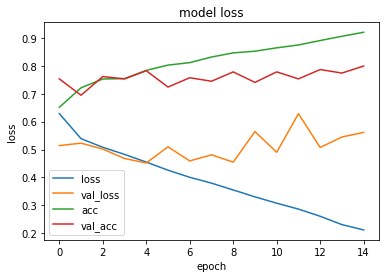

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
img = Image.open('/content/cat/cat1.jpg')
img = img.convert('RGB')
img = img.resize((64, 64))
img = np.asarray(img)
model.predict(np.array([img]))


array([[1.]], dtype=float32)